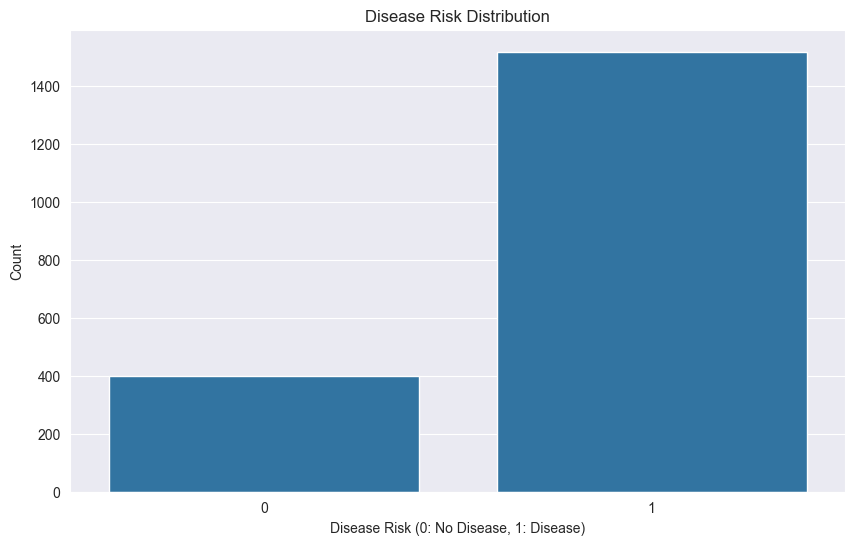

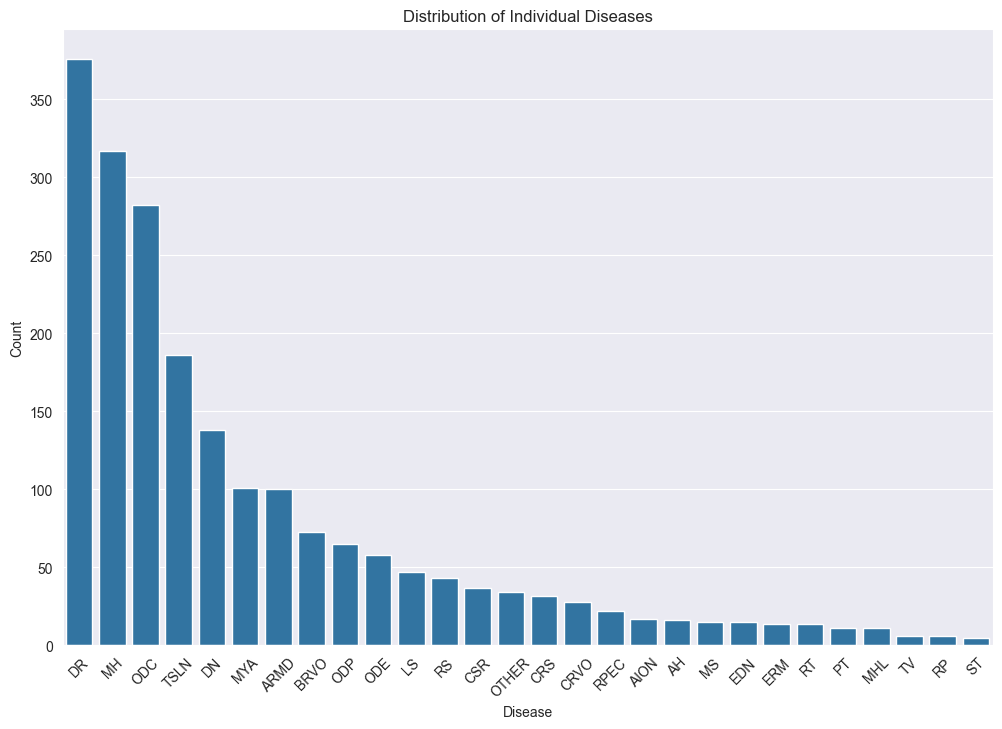

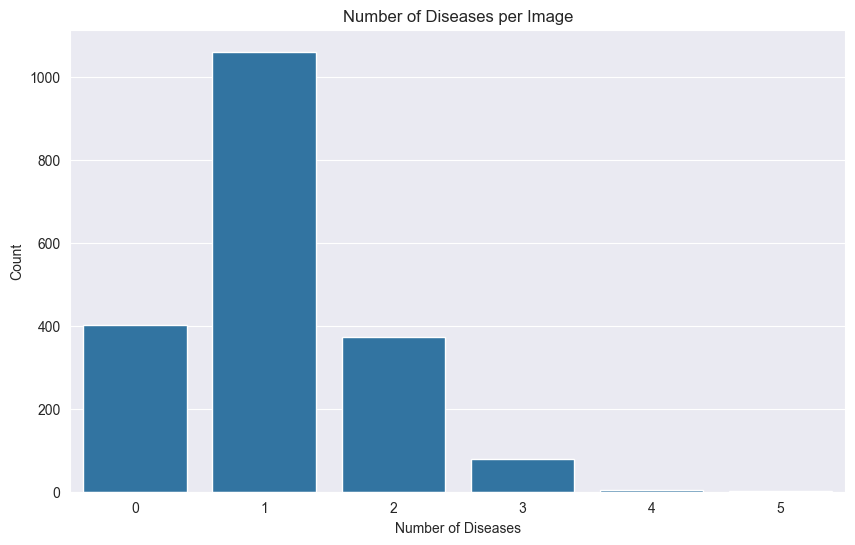

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_csv = "../data/train/RFMiD_Training_Labels.csv"
data = pd.read_csv(train_csv)

# Function to plot disease distribution
def plot_disease_distribution(df):
    # Disease risk distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Disease_Risk", data=df)
    plt.title("Disease Risk Distribution")
    plt.xlabel("Disease Risk (0: No Disease, 1: Disease)")
    plt.ylabel("Count")
    plt.show()

    # Individual disease distribution
    disease_cols = df.columns[2:]  # Skip ID and Disease_Risk
    disease_counts = df[disease_cols].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=disease_counts.index, y=disease_counts.values)
    plt.title("Distribution of Individual Diseases")
    plt.xlabel("Disease")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Function to analyze multi-label occurrences
def analyze_multilabel(df):
    disease_cols = df.columns[2:]
    df["num_diseases"] = df[disease_cols].sum(axis=1)

    # Count of number of diseases per patient
    plt.figure(figsize=(10, 6))
    sns.countplot(x="num_diseases", data=df)
    plt.title("Number of Diseases per Image")
    plt.xlabel("Number of Diseases")
    plt.ylabel("Count")
    plt.show()

# Execute analysis
plot_disease_distribution(data)
analyze_multilabel(data)
